## Question 3 Exam 2
### Name: Ioannis Konstantakopoulos , 
### st.num:0960047
As i was reading the paper(https://www.researchgate.net/publication/271465504_The_Dynamics_of_Emotions_in_Movie_Consumption_A_Spectator-Centred_Approach) i realize the importance of the emotion in the movies. That was the main reason i wanted to choose classify emotions,showing an emotion correctly can make a huge difference in a movie. Also some emotions like anger they are the main attraction for instance in Taken (https://www.imdb.com/title/tt0936501/) the whole movie is based on the anger of the father to take revenge for his daughters kidapping. So i believe is important to choose the emotions as a feature. I start loading the trailers.csv and after spliting them in subsets from 1920-1940, 1960-1980 and 2000-2020 random picking 10 samples from each category of trailers.I downloaded them using an stackoverflow code(was really helpfull to also gather the paths). After that i used the models we had from the tutorial to get all the scenes and load the face classification model.I use the exact same labels as the manual because i think those are the most importants in any movie. To tackle the most important problem in the question (dimensionality) i combined all the trailers in one loop and took the describe function to take the mean of all emotions. For instance if i have 10 scenes in a movie and 30 in the other, taking the mean of angry emotions for instance will help with the dimensionality difference. As i itterate many times the responces i found its easier to transpose my results, they where way more easy to read and interprate my results(As i have already know from the first block on this master and the course Data Wrangling). Using describe as a display for the summary stats(took this idea from the manual and we used it a lot in the fist lectures) i am going to find the mean of all emotions. Even though describe illustrates other variables i will only use the mean (i try only taking the mean without using describe but i was not able to succeed) i took all the subsets together to make my loop easier and then just took the samples as they still are in order. After i will take the mean of all the emotions and illustrate my results, also to find which emotion is the most common in every subset. For my research I expect to find a big uptrend in emotions as the years passes.

In [ ]:
!pip install scenedetect
!pip install wget
!pip install opencv-python
!pip install generate_images
import os
import cv2
import wget
from tqdm.notebook import tqdm
import random as rd
import numpy as np
import pandas as pd

from scenedetect import VideoManager
from scenedetect import SceneManager
from scenedetect.detectors import ContentDetector
#from scenedetect.scene_manager import generate_images
import matplotlib.pyplot as plt
import numpy as np


ERROR: Could not find a version that satisfies the requirement generate_images (from versions: none)
ERROR: No matching distribution found for generate_images


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Q3/trailers.csv')
df.head()

,trailer_title,url,imdb_id,year,rating,votes,genre
0,THE BIG PARADE trailer,https://archive.org/download/TheBigParadeTrail...,15624,1925,7.9,6148.0,Drama|Romance|War
1,ALL QUIET ON THE WESTERN FRONT 1930 trailer,https://archive.org/download/AllQuietOnTheWest...,20629,1930,8.0,56948.0,Drama|War
2,THE OREGON TRAIL trailer,https://archive.org/download/TheOregonTrailTra...,20691,1926,7.2,3353.0,Adventure|Romance|Western
3,FIVE STAR FINAL trailer,https://archive.org/download/FiveStarFinalTrai...,21873,1931,7.2,1790.0,Crime|Drama
4,LITTLE CAESAR trailer,https://archive.org/download/LittleCaesarTrail...,21079,1931,7.3,11958.0,Action|Crime|Drama|Romance


In [ ]:
#making a list of the years i want so i can pick numbers
list_20_40 = list(range(1920,1940))
list_60_80 = list(range(1960,1980))
list_00_later = list(range(2000,2020))

In [ ]:
trailer_20_40 = df[df["year"].isin(list_20_40)]
trailer_60_80 = df[df["year"].isin(list_60_80)]
trailer_00_later = df[df["year"].isin(list_00_later)]

In [ ]:
#https://stackoverflow.com/questions/32462273/how-to-use-random-randomstate to pick the trailers
trailer_20_40_sample = trailer_20_40.sample(10, random_state=10).reset_index(drop=True)
trailer_60_80_sample = trailer_60_80.sample(10, random_state=10).reset_index(drop=True)
trailer_00_later_sample = trailer_00_later.sample(10, random_state=10).reset_index(drop=True)

#we can concatenate our result (took it from manual) so its easier to have my results in one go
trailer_samples = pd.concat([trailer_20_40_sample, trailer_60_80_sample, trailer_00_later_sample])
trailer_samples.head()

,trailer_title,url,imdb_id,year,rating,votes,genre
0,BEAU GESTE 1939 trailer,https://archive.org/download/BeauGesteTrailer/...,31088,1939,7.6,5485.0,Action|Adventure|Drama|War
1,ROOM SERVICE trailer,https://archive.org/download/RoomServiceTraile...,30696,1938,6.7,4733.0,Comedy
2,THE WOMEN 1939 trailer,https://archive.org/download/TheWomen1939Trail...,32143,1939,7.8,12480.0,Comedy|Drama
3,HARD TO HANDLE trailer,https://archive.org/download/HardToHandleTrail...,26914,1935,6.4,1055.0,Drama|Musical|Comedy
4,THE BRIDE OF FRANKENSTEIN 1935 trailer,https://archive.org/download/TheBrideOfFranken...,26138,1935,7.8,43186.0,Drama|Horror|Sci-Fi


In [ ]:
 #manual and myself the most part(stackoverflow) and (https://docs.python.org/3/library/os.path.html) the os path library
 # i download the videos i use the not os if i accidentaly run this again i will have no problem
 for i in range(len(trailer_samples)):
    trailer = trailer_samples.iloc[i]
   
    trailer_url = trailer["url"] #extract the url 
    trailer_file = trailer_url.split("/")[-1] #using the -1 to start from the end and removing the /
    if not os.path.isfile(trailer_file):
        os.system("wget " + trailer_url)

In [ ]:
#i will split the scenes code from manual
def find_scenes(video_path, threshold=30.0):
    video_manager = VideoManager([video_path])
    scene_manager = SceneManager()
    scene_manager.add_detector(
        ContentDetector(threshold=threshold))
    base_timecode = video_manager.get_base_timecode()
    video_manager.set_downscale_factor()
    video_manager.start()
    scene_manager.detect_scenes(frame_source=video_manager, show_progress=False)    
    return scene_manager.get_scene_list(base_timecode)



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

!wget https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5      
#now the face classification with the  model from tutorial
face_classification = cv2.CascadeClassifier('/content/drive/MyDrive/Q2/haarcascade_frontalface_default (1).xml') # load the classifier only once!
#the emotion classifier also from the tutorial
emotion_classifier = load_model('/content/drive/MyDrive/5.2/fer2013_mini_XCEPTION.102-0.66.hdf5') # load this only once! (not in a loop)
EMOTION_OFFSETS = (0, 0)
INPUT_SHAPE_EMOTION = emotion_classifier.input_shape[1:3]
labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']


--2021-01-18 10:54:08--  https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oarriaga/face_classification/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 [following]
--2021-01-18 10:54:08--  https://raw.githubusercontent.com/oarriaga/face_classification/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 872856 (852K) [application/octet-stream]
Saving to: ‘fer2013_mini_XCEPTION.102-0.66.hd

In [ ]:
from tensorflow.keras.models import load_model

def apply_offsets(face_coordinates, offsets):
    """
    Derived from https://github.com/oarriaga/face_classification/blob/
    b861d21b0e76ca5514cdeb5b56a689b7318584f4/src/utils/inference.py#L21
    """
    x, y, width, height = face_coordinates
    x_off, y_off = offsets
    return (x - x_off, x + width + x_off, y - y_off, y + height + y_off)

Now I have to create the loop to find first the faces and then the emotions from the one combine subsets I have. Then I am going to create 2 dataframes that contain all the faces and all the emotions. I am going to use the emotions,after I spilt the dataframe by 3 pieces of 10 trailers in order to create my 3 subsets and finish my research. 

In [ ]:
#firstly i am going to create the dataframes and append all the faces and the emotions 
all_trailer_faces = pd.DataFrame()
all_trailer_emotions = pd.DataFrame()

In [ ]:
#code mainly tutorial(the functions) and stackoverflow and myself i used the transpose because the matrix was ugly in the beggining
#i have to loop through all the videos
for i in range(len(trailer_samples)): #to get the trailers
    trailer = trailer_samples.iloc[i]
    trailer_url = trailer["url"]
    trailer_file = trailer_url.split("/")[-1]
    if os.path.isfile(str(trailer_file)):
        print (str(trailer_file))
    else:
        print(f"error with the {trailer_file}")
     # easiest way to exctract what i needed to find the faces
    filename = trailer_file
    if filename not in all_trailer_faces.index:
        cap = cv2.VideoCapture(filename)
        frames = []
        scene_list = find_scenes(filename, threshold=30)
        for start_time, end_time in scene_list:
            duration = end_time - start_time
            frame = (start_time.get_frames() + int(duration.get_frames() / 2))
            cap.set(cv2.CAP_PROP_POS_FRAMES,frame)
            ret, frame = cap.read()
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(frame)

        # get amount of faces in frame
        frame_faces = []
        emotions_probas = []
        for frame in frames:
            gray_image = frame
            faces = face_classification.detectMultiScale(gray_image, 1.3, 5) # detect the faces 
            n_faces = len(faces) # get the number of faces
            frame_faces.append(n_faces)
            # for each frame with faces, I want to get the emotions
            if n_faces > 0:
                for face_coordinates in faces:
                    x1, x2, y1, y2 = apply_offsets(face_coordinates, EMOTION_OFFSETS) 
                    face_img = gray_image[y1:y2, x1:x2] # only get the face
                    face_img = cv2.resize(face_img, (INPUT_SHAPE_EMOTION))
                    face_img = face_img.astype('float32') / 255.0 # pre-processing 
                    face_img = face_img - 0.5 # pre-processing specific to the emotion classifier
                    face_img = face_img * 2.0 # pre-processing specific to the emotion classifier
                    face_img = np.expand_dims(face_img, 0) # batch of one
                    face_img = np.expand_dims(face_img, -1) # pre-processing specific to the emotion classifier
                    probas = emotion_classifier.predict(face_img).squeeze()
                    # add emotions of all faces to a list
                    emotions_probas.append(probas)
        face_described = pd.DataFrame(frame_faces).describe() # I tried here to take only the mean but I wasnt able
        face_described_transp = face_described.transpose() # as I said in the intoduction taking the transpose helped me with the results

        
        face_described_transp.index = [str(trailer_file)]
        all_trailer_faces = pd.concat([all_trailer_faces, face_described.transpose()]) # I concatenate the results together 
        
        # i got the idea from tutorial to make a dataframe for my probabilities but used the stackoverflow to finish the job
        emotions_probas_df = pd.DataFrame(emotions_probas, columns = labels)
        all_described_emotions = pd.DataFrame()
        for label in labels: 
            all_described_emotion = pd.DataFrame(emotions_probas_df[label].describe())
            all_described_emotion_transp = all_described_emotion.transpose()
            all_described_emotions = pd.concat([all_described_emotions, all_described_emotion_transp.reset_index(drop=True)], axis=1)
        all_described_emotions.index = [filename]
        all_trailer_emotions = pd.concat([all_trailer_emotions, all_described_emotions])  # I concatenate the results together      
        
        

Now that i found all the emotions for all movies i will split them in 3 subsets and make my conclusion

In [ ]:
movies_1920_1940 = all_trailer_emotions[0:10]
movies_1920_1940[:3]

,angry_count,angry_mean,angry_std,angry_min,angry_25%,angry_50%,angry_75%,angry_max,disgust_count,disgust_mean,disgust_std,disgust_min,disgust_25%,disgust_50%,disgust_75%,disgust_max,fear_count,fear_mean,fear_std,fear_min,fear_25%,fear_50%,fear_75%,fear_max,happy_count,happy_mean,happy_std,happy_min,happy_25%,happy_50%,happy_75%,happy_max,sad_count,sad_mean,sad_std,sad_min,sad_25%,sad_50%,sad_75%,sad_max,surprise_count,surprise_mean,surprise_std,surprise_min,surprise_25%,surprise_50%,surprise_75%,surprise_max,neutral_count,neutral_mean,neutral_std,neutral_min,neutral_25%,neutral_50%,neutral_75%,neutral_max,angry_unique,angry_top,angry_freq,disgust_unique,disgust_top,disgust_freq,fear_unique,fear_top,fear_freq,happy_unique,happy_top,happy_freq,sad_unique,sad_top,sad_freq,surprise_unique,surprise_top,surprise_freq,neutral_unique,neutral_top,neutral_freq
BeauGesteTrailet.mp4,5,0.394431,0.264483,0.087655,0.183729,0.390147,0.60451,0.706116,5,0.013069,0.017273,0.000163,0.000785,0.009672,0.012266,0.042459,5,0.144608,0.017668,0.115282,0.141596,0.152562,0.153715,0.159884,5,0.016875,0.035545,0.000038,0.000352,0.000723,0.002833,0.080429,5,0.327722,0.18038,0.109317,0.161691,0.398945,0.464881,0.503775,5,0.015475,0.014378,0.000924,0.005194,0.010718,0.025316,0.035224,5,0.087820,0.096635,0.006918,0.031430,0.073503,0.074376,0.252872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomServiceTrailer.mp4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
TheWomen1939Trailer.mp4,1,0.068510,NaN,0.068510,0.068510,0.068510,0.06851,0.068510,1,0.001140,NaN,0.001140,0.001140,0.001140,0.001140,0.001140,1,0.319867,NaN,0.319867,0.319867,0.319867,0.319867,0.319867,1,0.088687,NaN,0.088687,0.088687,0.088687,0.088687,0.088687,1,0.257059,NaN,0.257059,0.257059,0.257059,0.257059,0.257059,1,0.029831,NaN,0.029831,0.029831,0.029831,0.029831,0.029831,1,0.234907,NaN,0.234907,0.234907,0.234907,0.234907,0.234907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movies_1960_1980 = all_trailer_emotions[10:20]
movies_1960_1980[:3]

,angry_count,angry_mean,angry_std,angry_min,angry_25%,angry_50%,angry_75%,angry_max,disgust_count,disgust_mean,disgust_std,disgust_min,disgust_25%,disgust_50%,disgust_75%,disgust_max,fear_count,fear_mean,fear_std,fear_min,fear_25%,fear_50%,fear_75%,fear_max,happy_count,happy_mean,happy_std,happy_min,happy_25%,happy_50%,happy_75%,happy_max,sad_count,sad_mean,sad_std,sad_min,sad_25%,sad_50%,sad_75%,sad_max,surprise_count,surprise_mean,surprise_std,surprise_min,surprise_25%,surprise_50%,surprise_75%,surprise_max,neutral_count,neutral_mean,neutral_std,neutral_min,neutral_25%,neutral_50%,neutral_75%,neutral_max,angry_unique,angry_top,angry_freq,disgust_unique,disgust_top,disgust_freq,fear_unique,fear_top,fear_freq,happy_unique,happy_top,happy_freq,sad_unique,sad_top,sad_freq,surprise_unique,surprise_top,surprise_freq,neutral_unique,neutral_top,neutral_freq
TheMummysShroudTrailer.mp4,23,0.181688,0.191903,0.006364,0.054256,0.107395,0.274423,0.844930,23,0.006097,0.008492,2.592513e-08,0.000289,0.001941,0.007062,0.029067,23,0.071579,0.071206,0.000759,0.022123,0.051765,0.095789,0.322174,23,0.089832,0.199856,0.000120,0.007248,0.032089,0.070890,0.960456,23,0.388366,0.235792,0.025701,0.203781,0.454869,0.565657,0.789476,23,0.039889,0.043809,0.000408,0.001794,0.032641,0.054846,0.137366,23,0.222549,0.264889,0.005479,0.051001,0.092846,0.278854,0.788497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TheThingWithTwoHeadsTrailer.mp4,18,0.185396,0.175313,0.010068,0.055310,0.099254,0.273188,0.638218,18,0.015331,0.031117,2.649773e-05,0.000253,0.003494,0.010058,0.113631,18,0.088652,0.070280,0.000667,0.033288,0.079023,0.127248,0.219800,18,0.083731,0.228977,0.000055,0.001123,0.004667,0.037624,0.978220,18,0.404631,0.230582,0.002855,0.241280,0.447058,0.551037,0.815202,18,0.012489,0.016722,0.000030,0.001558,0.003953,0.015803,0.052401,18,0.209770,0.252956,0.004890,0.069372,0.099282,0.264857,0.885358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TheDayTheEarthCaughtFireTrailer.mp4,1,0.324593,NaN,0.324593,0.324593,0.324593,0.324593,0.324593,1,0.000443,NaN,4.428596e-04,0.000443,0.000443,0.000443,0.000443,1,0.212492,NaN,0.212492,0.212492,0.212492,0.212492,0.212492,1,0.083114,NaN,0.083114,0.083114,0.083114,0.083114,0.083114,1,0.262232,NaN,0.262232,0.262232,0.262232,0.262232,0.262232,1,0.009123,NaN,0.009123,0.009123,0.009123,0.009123,0.009123,1,0.108003,NaN,0.108003,0.108003,0.108003,0.108003,0.108003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movies_2000_later = all_trailer_emotions[20:30]
movies_2000_later[:3]

,angry_count,angry_mean,angry_std,angry_min,angry_25%,angry_50%,angry_75%,angry_max,disgust_count,disgust_mean,disgust_std,disgust_min,disgust_25%,disgust_50%,disgust_75%,disgust_max,fear_count,fear_mean,fear_std,fear_min,fear_25%,fear_50%,fear_75%,fear_max,happy_count,happy_mean,happy_std,happy_min,happy_25%,happy_50%,happy_75%,happy_max,sad_count,sad_mean,sad_std,sad_min,sad_25%,sad_50%,sad_75%,sad_max,surprise_count,surprise_mean,surprise_std,surprise_min,surprise_25%,surprise_50%,surprise_75%,surprise_max,neutral_count,neutral_mean,neutral_std,neutral_min,neutral_25%,neutral_50%,neutral_75%,neutral_max,angry_unique,angry_top,angry_freq,disgust_unique,disgust_top,disgust_freq,fear_unique,fear_top,fear_freq,happy_unique,happy_top,happy_freq,sad_unique,sad_top,sad_freq,surprise_unique,surprise_top,surprise_freq,neutral_unique,neutral_top,neutral_freq
MadHotBallroomTrailer.mp4,52,0.114869,0.119596,0.000167,0.016366,0.050453,0.188892,0.400100,52,0.019811,0.061326,0.000004,0.000285,0.003131,0.011972,0.377189,52,0.094483,0.091248,0.000681,0.028245,0.065720,0.132175,0.427410,52,0.281462,0.330010,0.000310,0.029803,0.128528,0.419354,0.996572,52,0.236865,0.192957,0.000714,0.071385,0.205830,0.347777,0.837587,52,0.044985,0.070817,0.000083,0.005777,0.017773,0.057721,0.441403,52,0.207526,0.221655,0.001677,0.057368,0.129646,0.299996,0.892423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HangmansCurseTrailer.mp4,2,0.094560,0.007481,0.089270,0.091915,0.094560,0.097205,0.099850,2,0.005190,0.004139,0.002263,0.003727,0.005190,0.006653,0.008117,2,0.147194,0.117160,0.064350,0.105772,0.147194,0.188616,0.230039,2,0.065463,0.013247,0.056096,0.060779,0.065463,0.070146,0.074830,2,0.353342,0.008772,0.347140,0.350241,0.353342,0.356444,0.359545,2,0.202254,0.028901,0.181818,0.192036,0.202254,0.212472,0.222690,2,0.131996,0.054620,0.093374,0.112685,0.131996,0.151308,0.170619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NationalSecurityTrailer.mp4,35,0.236512,0.237923,0.000457,0.055574,0.135838,0.366832,0.901144,35,0.013382,0.023848,0.000003,0.000328,0.003530,0.015561,0.099480,35,0.160161,0.150280,0.000078,0.043994,0.099091,0.229190,0.534787,35,0.180593,0.291175,0.000054,0.002040,0.021216,0.225881,0.997794,35,0.199794,0.165810,0.000081,0.058492,0.171645,0.283763,0.579411,35,0.021804,0.044855,0.000097,0.001548,0.003477,0.016387,0.219407,35,0.187755,0.212576,0.001348,0.020112,0.113513,0.300533,0.866537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


i am going to find the mean of all emotions in every movie i have and i am going to implement 3 of them seperatly because for me they are the most important in movie. 

In [ ]:
angry_mean_1920_1940 = movies_1920_1940['angry_mean'].sum()/10
angry_mean_1960_1980 = movies_1960_1980['angry_mean'].sum()/10
angry_mean_2000_later = movies_2000_later['angry_mean'].sum()/10
print(angry_mean_1920_1940)
print(angry_mean_1960_1980)
print(angry_mean_2000_later)

0.1226510583857695
0.16423289165279195
0.18869636625438319


Almost the reason why i choose emotions in movies,as the years passes it is visual that the angry emotion is rising steadily. I expected a steeper uptrending due to the lots of action movies produced nowadays

In [ ]:
disgust_mean_1920_1940 = movies_1920_1940['disgust_mean'].sum()/10
disgust_mean_1960_1980 = movies_1960_1980['disgust_mean'].sum()/10
disgust_mean_2000_later = movies_2000_later['disgust_mean'].sum()/10
print(disgust_mean_1920_1940)
print(disgust_mean_1940_1960)
print(disgust_mean_2000_later)


0.005191985634141929
0.009086209810137505
0.010144178510526158


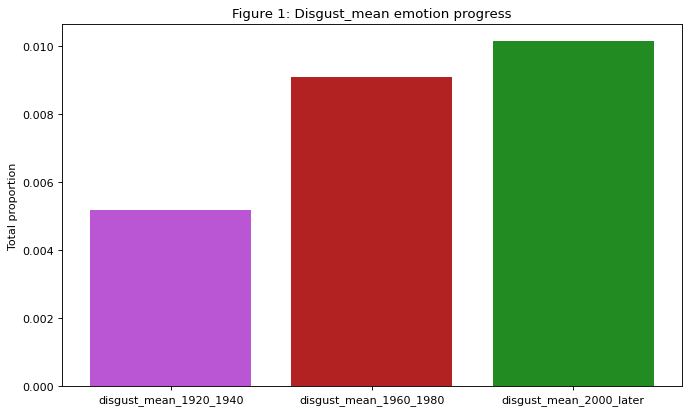

In [ ]:
# Make plots to present our results with a simple visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6), dpi= 80, facecolor='w', edgecolor='k')
y = [disgust_mean_1920_1940, disgust_mean_1960_1980,disgust_mean_2000_later]
x = ['disgust_mean_1920_1940', 'disgust_mean_1960_1980','disgust_mean_2000_later']
plt.bar(x, y, color = ['mediumorchid', 'firebrick','forestgreen'])
plt.ylabel('Total proportion')
plt.title('Figure 1: Disgust_mean emotion progress')
plt.show()

In [ ]:
fear_mean_1920_1940 = movies_1920_1940['fear_mean'].sum()/10
fear_mean_1960_1980 = movies_1960_1980['fear_mean'].sum()/10
fear_mean_2000_later = movies_2000_later['fear_mean'].sum()/10
print(fear_mean_1920_1940)
print(fear_mean_1960_1980)
print(fear_mean_2000_later)


0.08829382833481456
0.09506585407439394
0.10520774051827178


In [ ]:
happy_mean_1920_1940 = movies_1920_1940['happy_mean'].sum()/10
happy_mean_1960_1980 = movies_1960_1980['happy_mean'].sum()/10
happy_mean_2000_later = movies_2000_later['happy_mean'].sum()/10
print(happy_mean_1920_1940)
print(happy_mean_1960_1980)
print(happy_mean_2000_later)

0.14189436532618555
0.060978020161315115
0.19134325548877854


In [ ]:
sad_mean_1920_1940 = movies_1920_1940['sad_mean'].sum()/10
sad_mean_1960_1980 = movies_1960_1980['sad_mean'].sum()/10
sad_mean_2000_later = movies_2000_later['sad_mean'].sum()/10
print(sad_mean_1920_1940)
print(sad_mean_1960_1980)
print(sad_mean_2000_later)


0.151410392060255
0.2721319799873694
0.18158146326975405


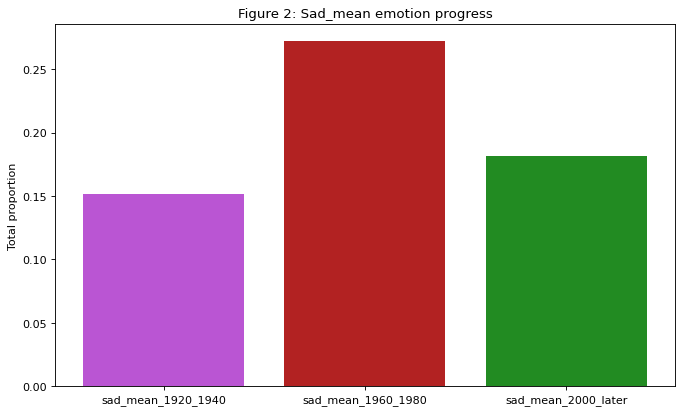

In [ ]:
plt.figure(figsize=(10,6), dpi= 80, facecolor='w', edgecolor='k')
y = [sad_mean_1920_1940, sad_mean_1960_1980,sad_mean_2000_later]
x = ['sad_mean_1920_1940', 'sad_mean_1960_1980','sad_mean_2000_later']
plt.bar(x, y, color = ['mediumorchid', 'firebrick','forestgreen'])
plt.ylabel('Total proportion')
plt.title('Figure 2: Sad_mean emotion progress')
plt.show()

Also a very strong feeling, sadness is almost in every movie, just for the suspence this emotion produce. Also the star actor will benefit from it to change things around.

In [ ]:
surprise_mean_1920_1940 = movies_1920_1940['surprise_mean'].sum()/10
surprise_mean_1960_1980 = movies_1960_1980['surprise_mean'].sum()/10
surprise_mean_2000_later = movies_2000_later['surprise_mean'].sum()/10
print(surprise_mean_1920_1940)
print(surprise_mean_1960_1980)
print(surprise_mean_2000_later)


0.06203642786616305
0.11098898061624327
0.05478923913020921


In [ ]:
neutral_mean_1920_1940 = movies_1920_1940['neutral_mean'].sum()/10
neutral_mean_1960_1980 = movies_1960_1980['neutral_mean'].sum()/10
neutral_mean_2000_later = movies_2000_later['neutral_mean'].sum()/10
print(neutral_mean_1920_1940)
print(neutral_mean_1960_1980)
print(neutral_mean_2000_later)


0.12852193017092456
0.18751606336951016
0.16823774897879767


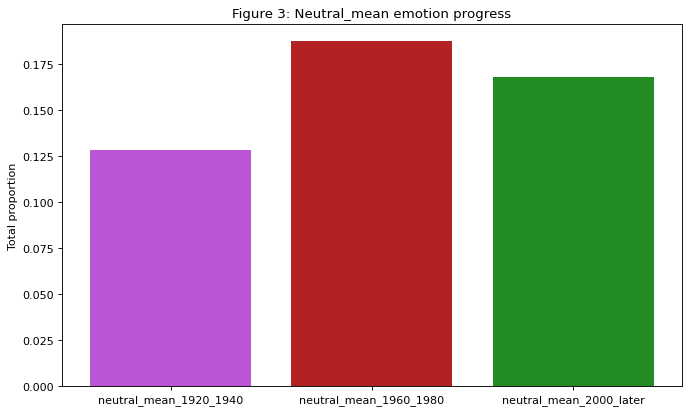

In [ ]:
plt.figure(figsize=(10,6), dpi= 80, facecolor='w', edgecolor='k')
y = [neutral_mean_1920_1940, neutral_mean_1960_1980,neutral_mean_2000_later]
x = ['neutral_mean_1920_1940', 'neutral_mean_1960_1980','neutral_mean_2000_later']
plt.bar(x, y, color = ['mediumorchid', 'firebrick','forestgreen'])
plt.ylabel('Total proportion')
plt.title('Figure 3: Neutral_mean emotion progress')
plt.show()

## Conclusion
First things first, i tried to tackle the dimensionality by, firstly taking the same amount of trailers per subset(10), secondly taking the mean of the emotions in every subset. About the results I would say for most cases as the years passes the emotions in the movies gets more and more. Even though i was expecting bigger changes in the emotions my result partialy agree with my statent, in some cases the changes are worth mentioned in others the changes are smaller .Almost in all cases the emotions was less in the first subset except happyness I assume the word wars had some engage into and people needed happyness those days. Also we can see in figure 2, the biggest flactuation is in surprise and sadness . The biggest uptrend can be found in the disgust emotion (figure 1), maybe the actors found a way to show this emotion in a better way for the model to understand it .Neural emotions change the least in all the years as we can see in figure 3. To conclude the most common emotion in every subset is: 1920-1940->sad , 1960-1980->sad , 2000-later -> happy, an oxymorus result.  